In [1]:
import pandas as pd

# Load the dataset
file_path = 'Big_Market_Sales.xlsx'
df = pd.read_excel(file_path,sheet_name = 'Big_Market_Sales_Data')
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


# Data Transformation and Distribution Analysis

## 1. Find out Distribution


### Distribution Plot
The distribution plot shows the distribution of ages in the dataset. It appears to be somewhat right-skewed.


C:\Users\USER\AppData\Local\Temp\ipykernel_5332\3642407791.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'], bins=30, kde=True, color='red')


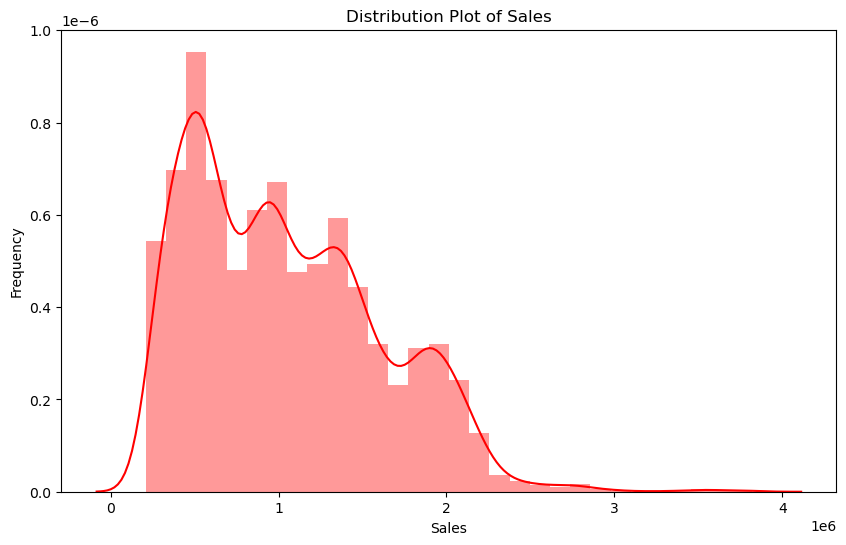

In [2]:

# Distribution plot code here
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np


# Create a distribution plot for the 'Sales' column
plt.figure(figsize=(10, 6))
sns.distplot(df['Weekly_Sales'], bins=30, kde=True, color='red')
plt.title('Distribution Plot of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()



The distribution plot above shows the distribution of ages in the dataset. It appears to be somewhat right-skewed.


### Skewness
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. A skewness value greater than 0 indicates that the data is skewed to the right.


In [3]:

# Skewnes
Weekly_Sales_skewness = df['Weekly_Sales'].skew()

Weekly_Sales_skewness

0.6683617974864524


### QQ Plot
A Q-Q (Quantile-Quantile) plot is another graphical tool to help us assess if a dataset follows a particular theoretical distribution. In a Q-Q plot, the x-axis represents the quantiles from the theoretical distribution, and the y-axis represents the quantiles from the dataset. If the points lie along the line \(y = x\), then the dataset follows the theoretical distribution.


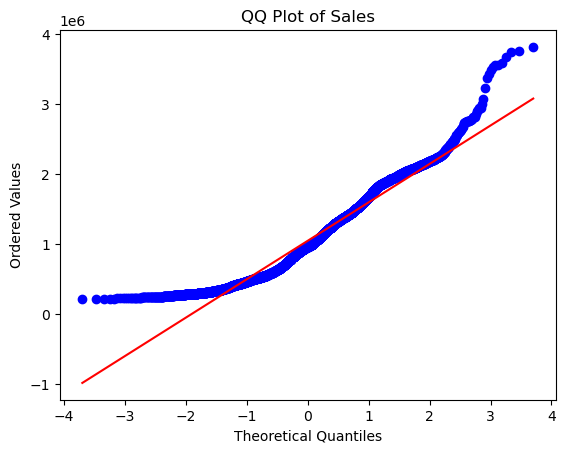

In [4]:

# QQ plot for sales before Transformation

stats.probplot(df['Weekly_Sales'], dist="norm", plot=plt)
plt.title('QQ Plot of Sales')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()



The QQ plot indicates that the points do not lie perfectly along the line y=x, suggesting that the Age data is not perfectly normally distributed. The divergence is more noticeable at the tails, further confirming the right-skewed nature of the distribution.

## 2. How to Use Transformation


Data transformation is the process of converting data from one form or structure into another. It can be used to stabilize variance, make the data more closely align with the normal distribution, and improve the interpretability and modeling power of the data.

To use a transformation, you generally apply a mathematical function to each data point in the column. 


## 3. When to Use Which Transformation


- **Log Transformation**: Useful for reducing right skewness. Effective for financial and exponential growth-related data.
- **Square Transformation**: Used for reducing left skewness.
- **Square Root Transformation**: Useful for reducing both right and left skewness but to a lesser extent than log and square transformations.
- **Box-Cox Transformation**: A more flexible approach that can handle both right and left skewness. One issue with Box-Cox Transformation is that it is ill-suited for use with negative values.


## 4. Cover Various Transformations

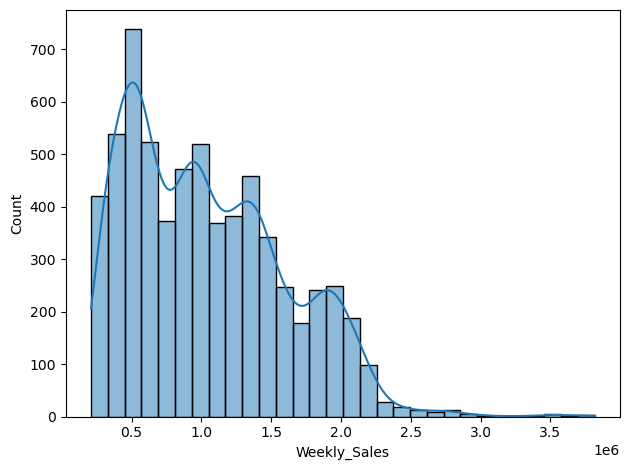

In [5]:



# Plot original Age distribution
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)





plt.tight_layout()
plt.show()



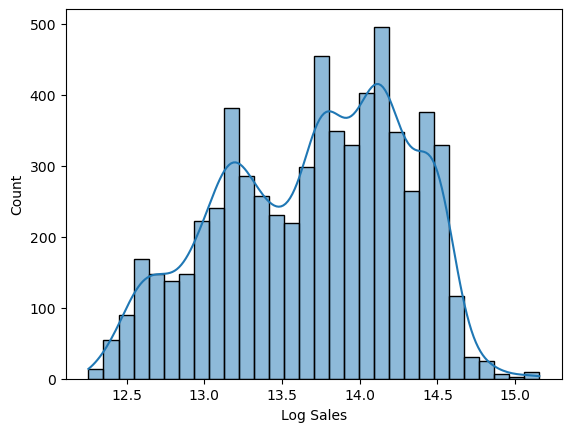

In [6]:
# Apply and plot Log Transformation
log_Weekly_Sales = np.log1p(df['Weekly_Sales'])  # Using log1p to handle zero values gracefully
sns.histplot(log_Weekly_Sales, bins=30, kde=True)
plt.xlabel("Log Sales")
plt.show()




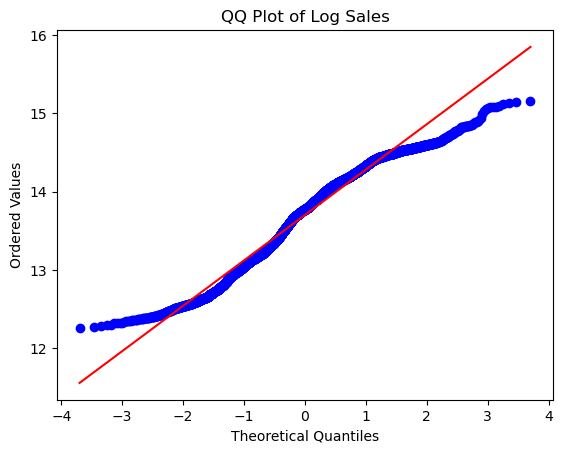

In [7]:

stats.probplot(log_Weekly_Sales, dist="norm", plot=plt)
plt.title('QQ Plot of Log Sales')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


## Temperature

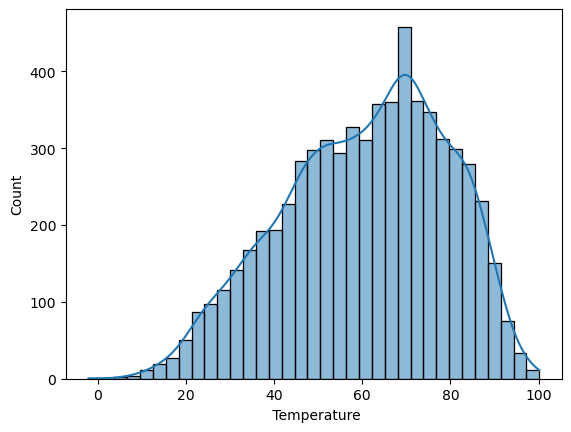

In [8]:
# Original Temperature Plot
sns.histplot(data = df, x = 'Temperature',kde = True)
plt.xlabel(" Temperature")
plt.show()

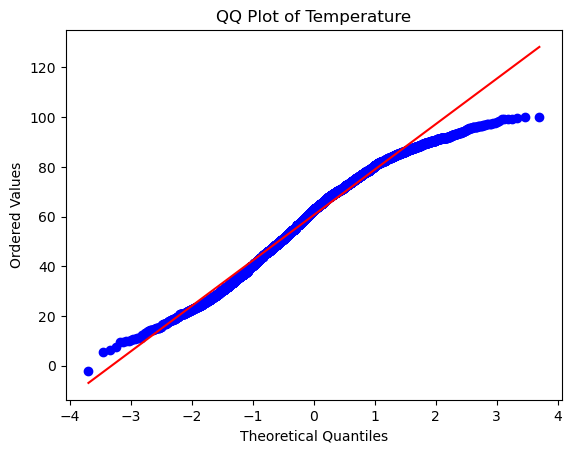

In [9]:

stats.probplot(df['Temperature'], dist="norm", plot=plt)
plt.title('QQ Plot of Temperature')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


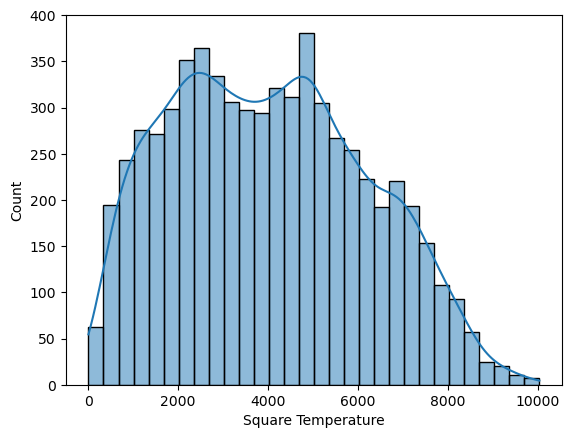

In [10]:
# Apply and plot Square Transformation
square_Temperature = df['Temperature'] ** 2
sns.histplot(square_Temperature, bins=30, kde=True)
plt.xlabel("Square Temperature")
plt.show()


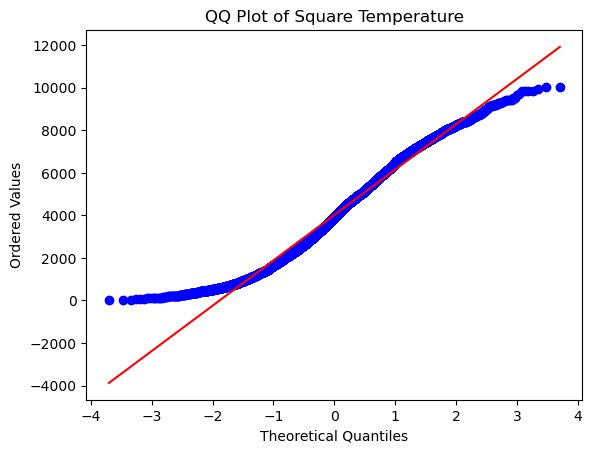

In [11]:


stats.probplot(square_Temperature, dist="norm", plot=plt)
plt.title('QQ Plot of Square Temperature')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


**Box-Cox**

Text(0, 0.5, 'Frequency')

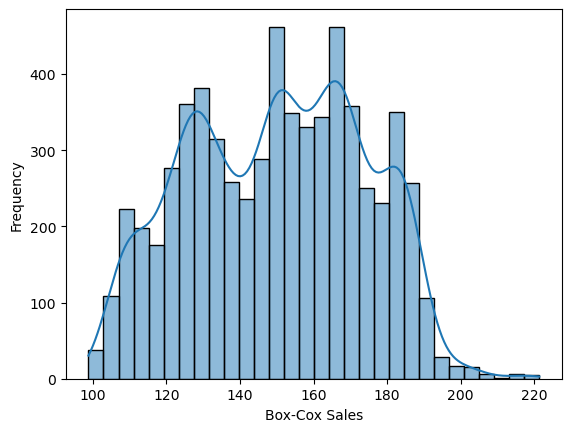

In [12]:
# Apply and plot Box-Cox Transformation
boxcox_Sales, _ = stats.boxcox(df['Weekly_Sales'])  # Second returned parameter is the lambda value
sns.histplot(boxcox_Sales, bins=30, kde=True)
plt.xlabel("Box-Cox Sales")
plt.ylabel('Frequency')

**yeo johnson**

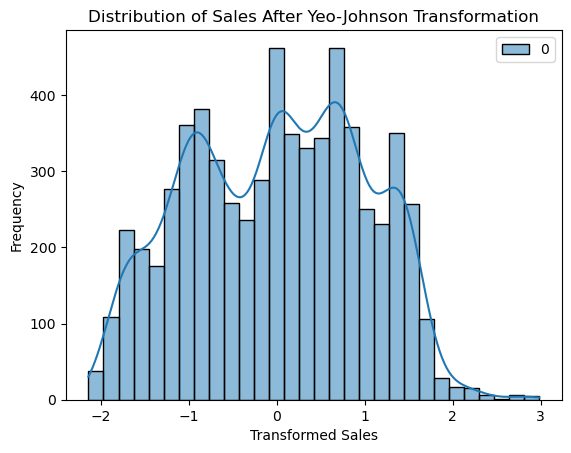

In [13]:
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer

# Yeo-Johnson transformation 
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
Weekly_Sales_yeo_johnson = yeo_johnson_transformer.fit_transform(df['Weekly_Sales'].values.reshape(-1, 1))



sns.histplot(Weekly_Sales_yeo_johnson, bins=30, kde=True)
plt.title('Distribution of Sales After Yeo-Johnson Transformation')
plt.xlabel('Transformed Sales')

plt.ylabel('Frequency')
plt.show()

In [14]:
Weekly_Sales_yeo_johnson

array([[ 1.06277781],
       [ 1.06063533],
       [ 1.02330627],
       ...,
       [-0.40667069],
       [-0.44327495],
       [-0.35002327]])

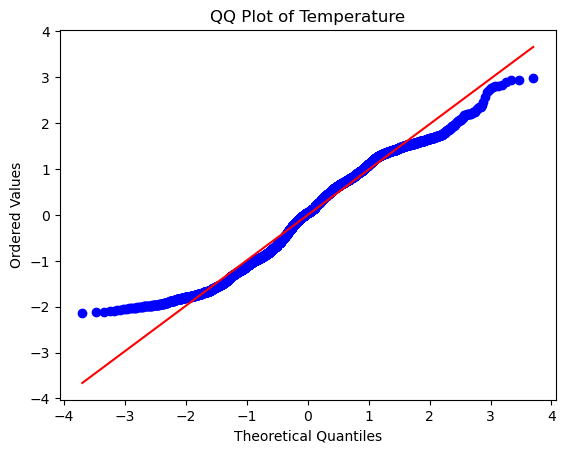

In [15]:
sales_yeo_johnson_series = pd.Series(Weekly_Sales_yeo_johnson.flatten())



stats.probplot(sales_yeo_johnson_series, dist="norm", plot=plt)
plt.title('QQ Plot of Temperature')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()
